In [105]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.utils import resample
from collections import Counter
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor




from sklearn import metrics
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV as gs
from sklearn.model_selection import RandomizedSearchCV as rs

import pickle

In [2]:
url='https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv'
g_powerplant_dataset=pd.read_csv(url)

# Exploratory Analysis

In [3]:
g_powerplant_dataset.shape

(907, 27)

size of the dataset is small

In [4]:
pd.set_option('display.max_columns', None)
g_powerplant_dataset.head(10)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,617.789264,843.7470,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,NaN,NaN,2005.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,1153.421000,1208.8520,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,NaN,NaN,NaN,1970.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,157.558250,152.1952,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN
7,IND,India,ALLAIN DUHANGAN,IND0000005,192.0,32.2258,77.2070,Hydro,NaN,NaN,NaN,2010.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,674.391100,721.3352,675.724400,679.594950,579.318850,NaN,Central Electricity Authority,NaN
8,IND,India,ALMATTI DAM,IND0000006,290.0,16.3300,75.8863,Hydro,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,480.594950,144.4342,402.029750,439.372100,406.377900,NaN,Central Electricity Authority,NaN
9,IND,India,AMAR KANTAK,IND0000007,210.0,23.1642,81.6373,Coal,Oil,NaN,NaN,2008.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2019.0,NaN,1887.904000,1643.0460,1338.093000,1563.457000,1487.880000,NaN,Central Electricity Authority,NaN


Indication and explanation of each column:
1. country and country_long indicates the country in which the powerplant is located in.
2. Name column indicates the name of the powerplant.
3. gppd_idnr: indicates the global power plant id number.
4. capacity_mw: electrical power generating capacity in megawatts.
5. latitude and longitude : are the geospatial location of the power plant.
6. primary_fuel: main source of fuel used to generate electricity by the powerplant.
7. other_fuel1,2,3: are the secondary source of energy used by the plant to generate electricity.
8. commissioning_year: year in which the power plant started operating.
9. owner: majority stakeholder of the powerplant.
10. source:entity reporting the data,could be an organization, report, or document, generally in Romanized form
11. url: web document corresponding to the source column.
12. geolocation source: location of the source column.
13. wepp_id: a reference to a unique plant identifier in the widely-used PLATTS-WEPP database
14. year_of_capacity_data: year the capacity information was reported
15. generation_gwh_2013,14,15,16,17,18,19: electricity generated by the powerplant during that corresponding year.
16. generation_data_source: attribution for the reported generation information
17. estimated_generation_gwh: estimated generation of electricity by the powerplant

In [5]:
g_powerplant_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [6]:
g_powerplant_dataset.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [7]:
g_powerplant_dataset.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [8]:
g_powerplant_dataset.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [9]:
g_powerplant_dataset.describe(include='all')

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
count,907,907,907,907,907.000000,861.000000,861.000000,907,198,1,0.0,527.000000,342,907,907,888,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,449,0.0
unique,1,1,907,907,NaN,NaN,NaN,8,3,1,NaN,NaN,280,191,304,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,IND,India,URI,WRI1020243,NaN,NaN,NaN,Coal,Oil,Oil,NaN,NaN,Acc Acc ltd,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Central Electricity Authority,NaN
freq,907,907,1,1,NaN,NaN,NaN,258,195,1,NaN,NaN,4,519,519,765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,449,NaN
mean,NaN,NaN,NaN,NaN,326.223755,21.197918,77.464907,NaN,NaN,NaN,NaN,1997.091082,NaN,NaN,NaN,NaN,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,590.085456,6.239612,4.939316,NaN,NaN,NaN,NaN,17.082868,NaN,NaN,NaN,NaN,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,8.168900,68.644700,NaN,NaN,NaN,NaN,1927.000000,NaN,NaN,NaN,NaN,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,16.725000,16.773900,74.256200,NaN,NaN,NaN,NaN,1988.000000,NaN,NaN,NaN,NaN,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,59.200000,21.780000,76.719500,NaN,NaN,NaN,NaN,2001.000000,NaN,NaN,NaN,NaN,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,385.250000,25.512400,79.440800,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN,NaN


In [10]:
poweplant_pfuel=pd.DataFrame(g_powerplant_dataset['primary_fuel'].value_counts())
poweplant_pfuel.rename(columns={'primary_fuel':'value counts'},inplace=True)
poweplant_pfuel.index.name='primary fuel'
poweplant_pfuel

,value counts
primary fuel,
Coal,258
Hydro,251
Solar,127
Wind,123
Gas,69
Biomass,50
Oil,20
Nuclear,9


In [11]:
poweplant_geos=pd.DataFrame(g_powerplant_dataset['geolocation_source'].value_counts())
poweplant_geos.rename(columns={'geolocation_source':'value counts'},inplace=True)
poweplant_geos.index.name='geolocation source'
poweplant_geos

,value counts
geolocation source,
WRI,765
Industry About,119
National Renewable Energy Laboratory,4


In [12]:
poweplant_fuel1=pd.DataFrame(g_powerplant_dataset['other_fuel1'].value_counts())
poweplant_fuel1.rename(columns={'other_fuel1':'value counts'},inplace=True)
poweplant_fuel1.index.name='other fuel1'
poweplant_fuel1

,value counts
other fuel1,
Oil,195
Gas,2
Cogeneration,1


Observations:
1. Size of the dataset is small and number of columns are 27.
2. Out of 27 columns in the dataset only 15 columns contains numerical data.
3. Dataset contains quite some null values.
4. country and country doesn't have any specific significance in the dataset as all elements in that columns are similar.
5. Name and gpp_idnr are the identification of powerplant these columns are more like serial numbers.
6. can't simply negotiate the null values with mean as for every primary fuel the standards are different.

In [13]:
g_powerplant_dataset.drop(columns=['country','country_long','name','gppd_idnr','latitude','longitude','other_fuel1','other_fuel2','other_fuel3','url','wepp_id','generation_gwh_2013','generation_gwh_2019','year_of_capacity_data','estimated_generation_gwh','generation_data_source'],inplace=True)

In [14]:
g_powerplant_dataset.isnull().sum()

capacity_mw              0
primary_fuel             0
commissioning_year     380
owner                  565
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [15]:
g_powerplant_dataset.nunique()

capacity_mw            361
primary_fuel             8
commissioning_year      73
owner                  280
source                 191
geolocation_source       3
generation_gwh_2014    371
generation_gwh_2015    396
generation_gwh_2016    403
generation_gwh_2017    408
generation_gwh_2018    410
dtype: int64

In [16]:
solar_set=g_powerplant_dataset[(g_powerplant_dataset.primary_fuel=='Solar')]
coal_set=g_powerplant_dataset[(g_powerplant_dataset.primary_fuel=='Coal')]
wind_set=g_powerplant_dataset[(g_powerplant_dataset.primary_fuel=='Wind')]
gas_set=g_powerplant_dataset[(g_powerplant_dataset.primary_fuel=='Gas')]
hydro_set=g_powerplant_dataset[(g_powerplant_dataset.primary_fuel=='Hydro')]
biomass_set=g_powerplant_dataset[(g_powerplant_dataset.primary_fuel=='Biomass')]
oil_set=g_powerplant_dataset[(g_powerplant_dataset.primary_fuel=='Oil')]
nuclear_set=g_powerplant_dataset[(g_powerplant_dataset.primary_fuel=='Nuclear')]

In [17]:
print('Solar Data \n',solar_set.shape)
solar_set.isnull().sum()

Solar Data 
 (127, 11)


capacity_mw              0
primary_fuel             0
commissioning_year     119
owner                    0
source                   0
geolocation_source       4
generation_gwh_2014    127
generation_gwh_2015    127
generation_gwh_2016    127
generation_gwh_2017    127
generation_gwh_2018    127
dtype: int64

as solar powerplant commissioning year mode is 2013 and 2014 I am replacing the mode as 2014

In [18]:
solar_set['commissioning_year'].fillna('2014', inplace=True)

In [19]:
solar_set['geolocation_source'].fillna(solar_set['geolocation_source'].mode()[0], inplace=True)

In [20]:
solar_set.isnull().sum()

capacity_mw              0
primary_fuel             0
commissioning_year       0
owner                    0
source                   0
geolocation_source       0
generation_gwh_2014    127
generation_gwh_2015    127
generation_gwh_2016    127
generation_gwh_2017    127
generation_gwh_2018    127
dtype: int64

In [21]:
print('Coal Data \n',coal_set.shape)

coal_set.isnull().sum()

Coal Data 
 (258, 11)


capacity_mw              0
primary_fuel             0
commissioning_year      69
owner                  189
source                   0
geolocation_source       0
generation_gwh_2014     97
generation_gwh_2015     81
generation_gwh_2016     76
generation_gwh_2017     71
generation_gwh_2018     70
dtype: int64

In [22]:
coal_set['commissioning_year'].fillna(coal_set['commissioning_year'].mode()[0], inplace=True)
coal_set['owner'].fillna(coal_set['owner'].mode()[0], inplace=True)
coal_set['generation_gwh_2014'].fillna(coal_set['generation_gwh_2014'].mean(), inplace=True)
coal_set['generation_gwh_2015'].fillna(coal_set['generation_gwh_2015'].mean(), inplace=True)
coal_set['generation_gwh_2016'].fillna(coal_set['generation_gwh_2016'].mean(), inplace=True)
coal_set['generation_gwh_2017'].fillna(coal_set['generation_gwh_2017'].mean(), inplace=True)
coal_set['generation_gwh_2018'].fillna(coal_set['generation_gwh_2018'].mean(), inplace=True)
coal_set.isnull().sum()

capacity_mw            0
primary_fuel           0
commissioning_year     0
owner                  0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [23]:
print('Wind Data \n',wind_set.shape)

wind_set.isnull().sum()

Wind Data 
 (123, 11)


capacity_mw              0
primary_fuel             0
commissioning_year     123
owner                   45
source                   0
geolocation_source      15
generation_gwh_2014    123
generation_gwh_2015    123
generation_gwh_2016    123
generation_gwh_2017    123
generation_gwh_2018    123
dtype: int64

In [24]:
wind_set['commissioning_year'].fillna(g_powerplant_dataset['commissioning_year'].mode()[0], inplace=True)
wind_set['owner'].fillna(wind_set['owner'].mode()[0], inplace=True)
wind_set['geolocation_source'].fillna(wind_set['geolocation_source'].mode()[0], inplace=True)
wind_set.isnull().sum()

capacity_mw              0
primary_fuel             0
commissioning_year       0
owner                    0
source                   0
geolocation_source       0
generation_gwh_2014    123
generation_gwh_2015    123
generation_gwh_2016    123
generation_gwh_2017    123
generation_gwh_2018    123
dtype: int64

In [25]:
print('Gas Data \n',gas_set.shape)

gas_set.isnull().sum()

Gas Data 
 (69, 11)


capacity_mw             0
primary_fuel            0
commissioning_year     10
owner                  59
source                  0
geolocation_source      0
generation_gwh_2014    16
generation_gwh_2015    14
generation_gwh_2016    11
generation_gwh_2017    13
generation_gwh_2018    11
dtype: int64

In [26]:
gas_set['commissioning_year'].fillna(gas_set['commissioning_year'].mode()[0], inplace=True)
gas_set['owner'].fillna(gas_set['owner'].mode()[0], inplace=True)
gas_set['generation_gwh_2014'].fillna(gas_set['generation_gwh_2014'].mean(), inplace=True)
gas_set['generation_gwh_2015'].fillna(gas_set['generation_gwh_2015'].mean(), inplace=True)
gas_set['generation_gwh_2016'].fillna(gas_set['generation_gwh_2016'].mean(), inplace=True)
gas_set['generation_gwh_2017'].fillna(gas_set['generation_gwh_2017'].mean(), inplace=True)
gas_set['generation_gwh_2018'].fillna(gas_set['generation_gwh_2018'].mean(), inplace=True)
gas_set.isnull().sum()

capacity_mw            0
primary_fuel           0
commissioning_year     0
owner                  0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [27]:
print('Hydro Data \n',hydro_set.shape)
hydro_set.isnull().sum()

Hydro Data 
 (251, 11)


capacity_mw              0
primary_fuel             0
commissioning_year       0
owner                  251
source                   0
geolocation_source       0
generation_gwh_2014     85
generation_gwh_2015     80
generation_gwh_2016     76
generation_gwh_2017     69
generation_gwh_2018     68
dtype: int64

from google search I got to a conclusion that all hydropowerplant are under supervision and owned by National Hydroelectric Power Corporation(NHPC)

In [28]:
hydro_set['owner'].fillna('NHPC', inplace=True)
hydro_set['generation_gwh_2014'].fillna(hydro_set['generation_gwh_2014'].mean(), inplace=True)
hydro_set['generation_gwh_2015'].fillna(hydro_set['generation_gwh_2015'].mean(), inplace=True)
hydro_set['generation_gwh_2016'].fillna(hydro_set['generation_gwh_2016'].mean(), inplace=True)
hydro_set['generation_gwh_2017'].fillna(hydro_set['generation_gwh_2017'].mean(), inplace=True)
hydro_set['generation_gwh_2018'].fillna(hydro_set['generation_gwh_2018'].mean(), inplace=True)
hydro_set.isnull().sum()

capacity_mw            0
primary_fuel           0
commissioning_year     0
owner                  0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [29]:
print('Biomass Data \n',biomass_set.shape)

biomass_set.isnull().sum()

Biomass Data 
 (50, 11)


capacity_mw             0
primary_fuel            0
commissioning_year     50
owner                   0
source                  0
geolocation_source      0
generation_gwh_2014    50
generation_gwh_2015    50
generation_gwh_2016    50
generation_gwh_2017    50
generation_gwh_2018    50
dtype: int64

In [30]:
biomass_set['capacity_mw'].mean()

20.0652

In [31]:
print('Oil Data \n',oil_set.shape)

oil_set.isnull().sum()

Oil Data 
 (20, 11)


capacity_mw             0
primary_fuel            0
commissioning_year      8
owner                  12
source                  0
geolocation_source      0
generation_gwh_2014     9
generation_gwh_2015     9
generation_gwh_2016     9
generation_gwh_2017    13
generation_gwh_2018     9
dtype: int64

In [32]:
oil_set['commissioning_year'].fillna(oil_set['commissioning_year'].mode()[0], inplace=True)
oil_set['owner'].fillna(oil_set['owner'].mode()[0], inplace=True)
oil_set['generation_gwh_2014'].fillna(oil_set['generation_gwh_2014'].mean(), inplace=True)
oil_set['generation_gwh_2015'].fillna(oil_set['generation_gwh_2015'].mean(), inplace=True)
oil_set['generation_gwh_2016'].fillna(oil_set['generation_gwh_2016'].mean(), inplace=True)
oil_set['generation_gwh_2017'].fillna(oil_set['generation_gwh_2017'].mean(), inplace=True)
oil_set['generation_gwh_2018'].fillna(oil_set['generation_gwh_2018'].mean(), inplace=True)
oil_set.isnull().sum()

capacity_mw            0
primary_fuel           0
commissioning_year     0
owner                  0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [33]:
print('Nuclear Data \n',nuclear_set.shape)

nuclear_set.isnull().sum()

Nuclear Data 
 (9, 11)


capacity_mw            0
primary_fuel           0
commissioning_year     1
owner                  9
source                 0
geolocation_source     0
generation_gwh_2014    2
generation_gwh_2015    1
generation_gwh_2016    1
generation_gwh_2017    1
generation_gwh_2018    1
dtype: int64

Nuclear Power Corporation of India (NPCIL) is the owner of the nuclear powerplants in India

In [34]:
nuclear_set['source'].mode()

0    Central Electricity Authority
dtype: object

In [35]:
nuclear_set['commissioning_year'].fillna(nuclear_set['commissioning_year'].mode()[0], inplace=True)
nuclear_set['owner'].fillna('NPCIL', inplace=True)
nuclear_set['generation_gwh_2014'].fillna(nuclear_set['generation_gwh_2014'].mean(), inplace=True)
nuclear_set['generation_gwh_2015'].fillna(nuclear_set['generation_gwh_2015'].mean(), inplace=True)
nuclear_set['generation_gwh_2016'].fillna(nuclear_set['generation_gwh_2016'].mean(), inplace=True)
nuclear_set['generation_gwh_2017'].fillna(nuclear_set['generation_gwh_2017'].mean(), inplace=True)
nuclear_set['generation_gwh_2018'].fillna(nuclear_set['generation_gwh_2018'].mean(), inplace=True)
nuclear_set.isnull().sum()

capacity_mw            0
primary_fuel           0
commissioning_year     0
owner                  0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [36]:
frames=[solar_set,coal_set,wind_set,gas_set,hydro_set,biomass_set,oil_set,nuclear_set]
result_set = pd.concat(frames)

In [37]:
result_set=result_set.sort_index()

In [38]:
result_set.isnull().sum()

capacity_mw              0
primary_fuel             0
commissioning_year      50
owner                    0
source                   0
geolocation_source       0
generation_gwh_2014    300
generation_gwh_2015    300
generation_gwh_2016    300
generation_gwh_2017    300
generation_gwh_2018    300
dtype: int64

In [39]:
result_set['commissioning_year'].fillna(result_set['commissioning_year'].mode()[0], inplace=True)

In [40]:
result_set['generation_gwh_2014'].fillna(result_set['generation_gwh_2014'].mean(), inplace=True)
result_set['generation_gwh_2015'].fillna(result_set['generation_gwh_2015'].mean(), inplace=True)
result_set['generation_gwh_2016'].fillna(result_set['generation_gwh_2016'].mean(), inplace=True)
result_set['generation_gwh_2017'].fillna(result_set['generation_gwh_2017'].mean(), inplace=True)
result_set['generation_gwh_2018'].fillna(result_set['generation_gwh_2018'].mean(), inplace=True)

In [41]:
result_set.isnull().sum()

capacity_mw            0
primary_fuel           0
commissioning_year     0
owner                  0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

In [42]:
result_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907 entries, 0 to 906
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   primary_fuel         907 non-null    object 
 2   commissioning_year   907 non-null    object 
 3   owner                907 non-null    object 
 4   source               907 non-null    object 
 5   geolocation_source   907 non-null    object 
 6   generation_gwh_2014  907 non-null    float64
 7   generation_gwh_2015  907 non-null    float64
 8   generation_gwh_2016  907 non-null    float64
 9   generation_gwh_2017  907 non-null    float64
 10  generation_gwh_2018  907 non-null    float64
dtypes: float64(6), object(5)
memory usage: 85.0+ KB


commissioning year Dtype is an object yet the representation is in numeric form so need to convert the Dtype of commissioning year

In [43]:
result_set['commissioning_year']=result_set['commissioning_year'].astype('float')

In [44]:
result_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907 entries, 0 to 906
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   capacity_mw          907 non-null    float64
 1   primary_fuel         907 non-null    object 
 2   commissioning_year   907 non-null    float64
 3   owner                907 non-null    object 
 4   source               907 non-null    object 
 5   geolocation_source   907 non-null    object 
 6   generation_gwh_2014  907 non-null    float64
 7   generation_gwh_2015  907 non-null    float64
 8   generation_gwh_2016  907 non-null    float64
 9   generation_gwh_2017  907 non-null    float64
 10  generation_gwh_2018  907 non-null    float64
dtypes: float64(7), object(4)
memory usage: 85.0+ KB


In [45]:
result_set.nunique()

capacity_mw            361
primary_fuel             8
commissioning_year      73
owner                  282
source                 191
geolocation_source       3
generation_gwh_2014    377
generation_gwh_2015    402
generation_gwh_2016    409
generation_gwh_2017    414
generation_gwh_2018    416
dtype: int64

In [46]:
result_set['geolocation_source'].value_counts()

WRI                                     780
Industry About                          123
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

Owner and source columns have too much categorical deviation which is helpful in both our predictions so dropping them can improve out predictions

In [47]:
result_set.drop(columns=['owner','source'],inplace=True)

In [48]:
result_set.head()

,capacity_mw,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,Solar,2011.0,National Renewable Energy Laboratory,2498.743142,2428.863290,2470.332276,2521.386641,2605.373790
1,98.0,Coal,2015.0,WRI,4737.279310,4649.585751,4761.233946,4870.537285,5036.420635
2,39.2,Wind,2015.0,WRI,2498.743142,2428.863290,2470.332276,2521.386641,2605.373790
3,135.0,Gas,2004.0,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,Coal,2015.0,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


Summary:
1. Most of the ordinal data isn't helping in prediction of our outcome except geolocation.
2. Primary Fuel data is very imbalanced.
3. In geolocation source National Renewable category is very minimal.
4. Removed owner and source as the number of categories where high and can affect prediction outcome.
5. Didn't Bin the data of capacity_mw for primary fuel prediction as the variation for each fuel was highly varying.

<AxesSubplot:xlabel='count', ylabel='primary_fuel'>

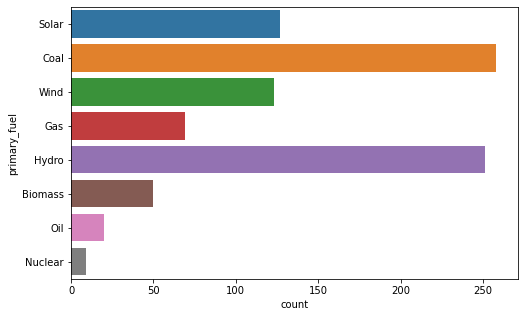

In [49]:
plt.figure(figsize = (8,5))
sns.countplot(y='primary_fuel' ,data=result_set)

<AxesSubplot:xlabel='count', ylabel='commissioning_year'>

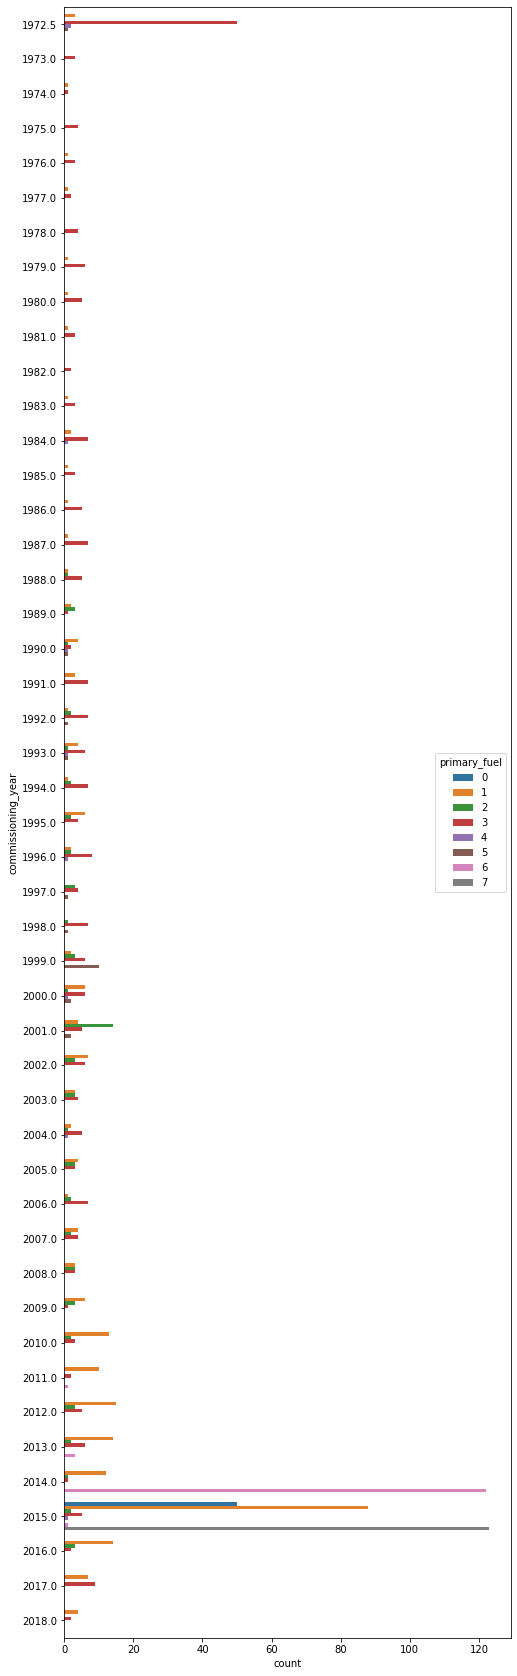

In [71]:
plt.figure(figsize = (8,30))
sns.countplot(y='commissioning_year',hue='primary_fuel' ,data=result_set)

<AxesSubplot:xlabel='count', ylabel='commissioning_year'>

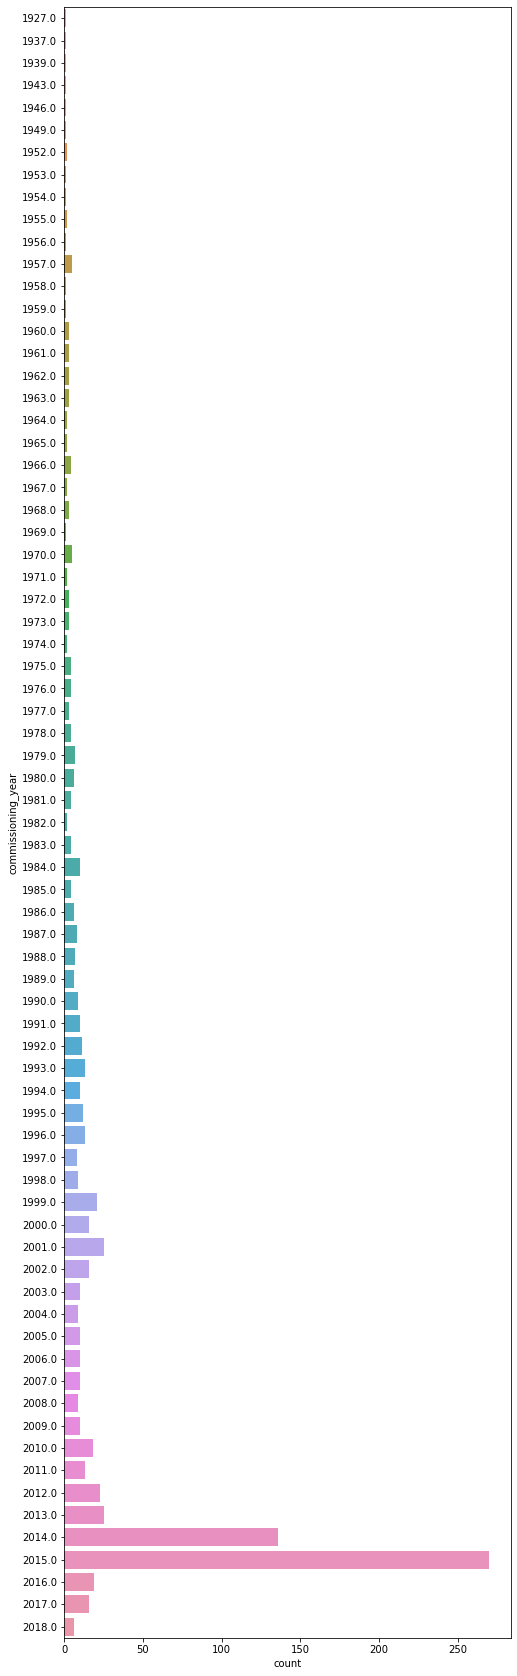

In [50]:
plt.figure(figsize = (8,30))
sns.countplot(y='commissioning_year' ,data=result_set)

<AxesSubplot:xlabel='count', ylabel='geolocation_source'>

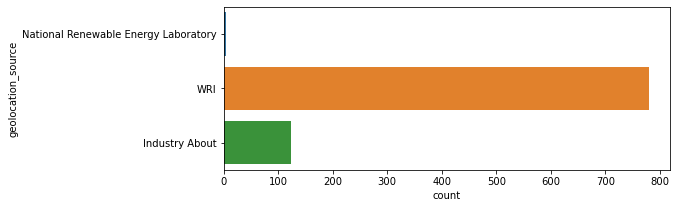

In [51]:
plt.figure(figsize = (8,3))
sns.countplot(y='geolocation_source' ,data=result_set)

In [53]:
le=LabelEncoder()
result_set['geolocation_source']=le.fit_transform(result_set['geolocation_source'])
result_set['primary_fuel']=le.fit_transform(result_set['primary_fuel'])
result_set

,capacity_mw,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,6,2011.0,1,2498.743142,2428.863290,2470.332276,2521.386641,2605.373790
1,98.0,1,2015.0,2,4737.279310,4649.585751,4761.233946,4870.537285,5036.420635
2,39.2,7,2015.0,2,2498.743142,2428.863290,2470.332276,2521.386641,2605.373790
3,135.0,2,2004.0,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,1,2015.0,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...
902,1600.0,1,2016.0,2,4737.279310,0.994875,233.596650,865.400000,686.500000
903,3.0,6,2014.0,0,2498.743142,2428.863290,2470.332276,2521.386641,2605.373790
904,25.5,7,2015.0,2,2498.743142,2428.863290,2470.332276,2521.386641,2605.373790
905,80.0,1,2015.0,2,4737.279310,4649.585751,4761.233946,4870.537285,5036.420635


capacity_mw


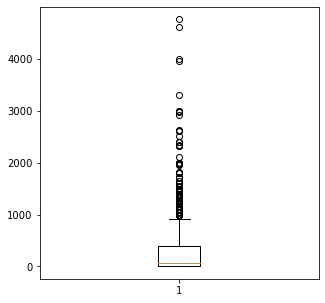

primary_fuel


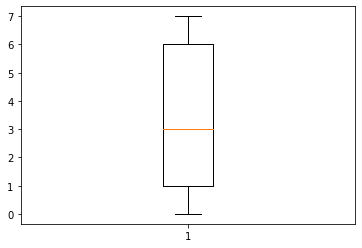

commissioning_year


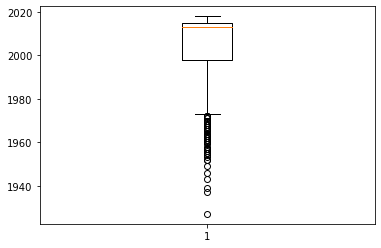

geolocation_source


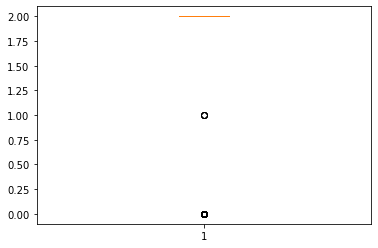

generation_gwh_2014


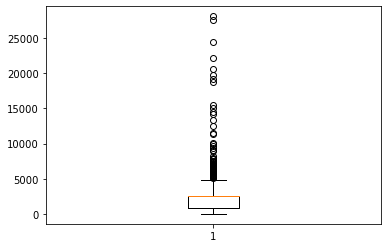

generation_gwh_2015


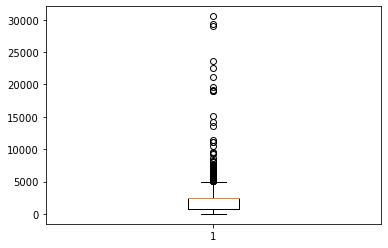

generation_gwh_2016


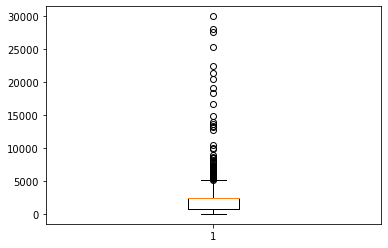

generation_gwh_2017


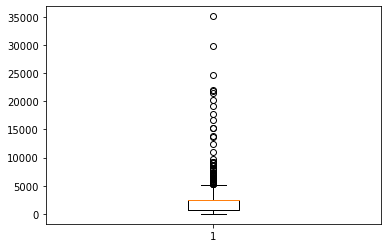

generation_gwh_2018


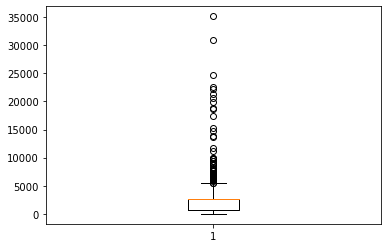

In [54]:
fig = plt.figure(figsize =(5, 5))
for i in result_set: 
    # Creating plot
    print(i)
    plt.boxplot(result_set[i])
    # show plot
    plt.show()

In [55]:
#arresting the outliers using IQR method
def arr_out(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    whisker_width = 1.5
    news_outliers = df[(df[column] < Q1 - whisker_width*IQR) | (df[column] > Q3 + df*IQR)]
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    df[column]=np.where(df[column]>upper_whisker,upper_whisker,np.where(df[column]<lower_whisker,lower_whisker,df[column]))

In [56]:
arr_out(result_set,'capacity_mw')
arr_out(result_set,'commissioning_year')
arr_out(result_set,'generation_gwh_2014')
arr_out(result_set,'generation_gwh_2015')
arr_out(result_set,'generation_gwh_2016')
arr_out(result_set,'generation_gwh_2017')
arr_out(result_set,'generation_gwh_2018')

capacity_mw


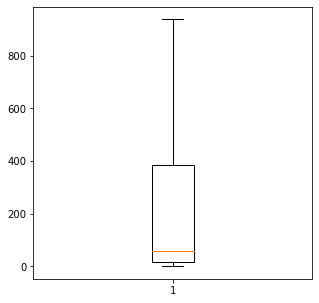

primary_fuel


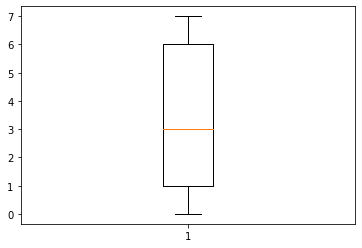

commissioning_year


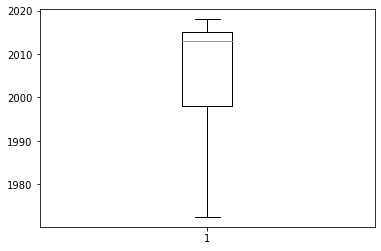

geolocation_source


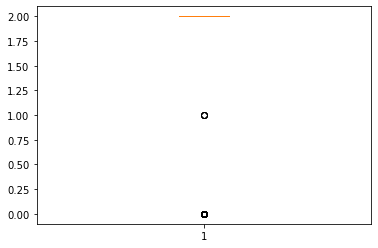

generation_gwh_2014


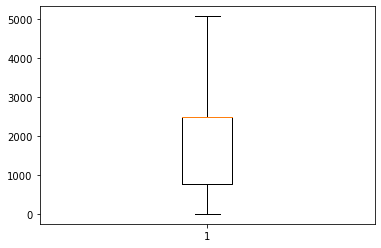

generation_gwh_2015


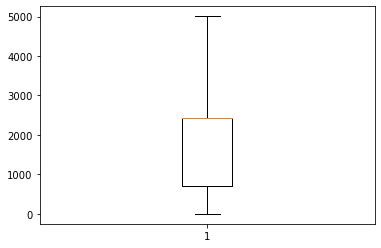

generation_gwh_2016


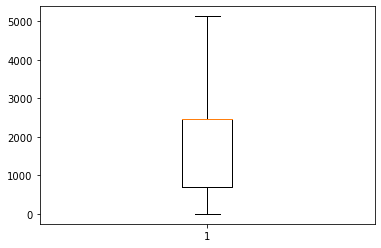

generation_gwh_2017


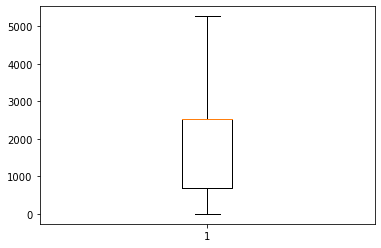

generation_gwh_2018


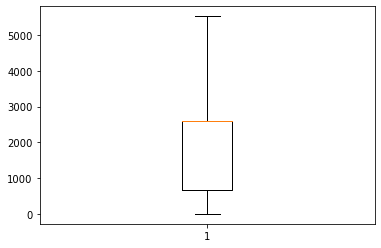

In [57]:
fig = plt.figure(figsize =(5, 5))
for i in result_set: 
    # Creating plot
    print(i)
    plt.boxplot(result_set[i])
    # show plot
    plt.show()

Outliers have been removed

capacity_mw


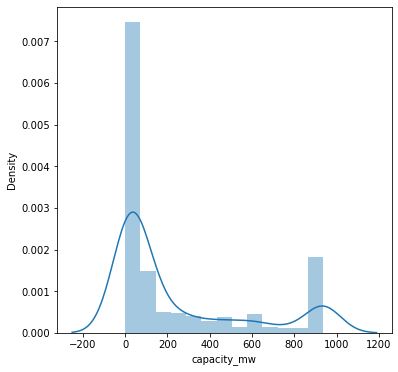

primary_fuel


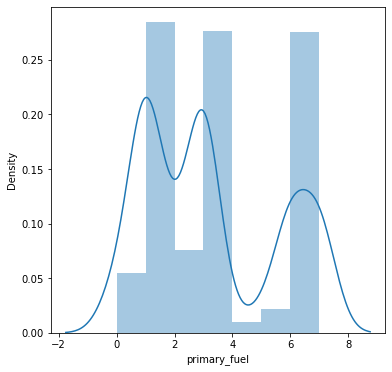

commissioning_year


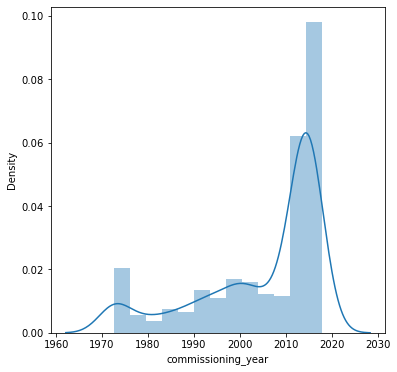

geolocation_source


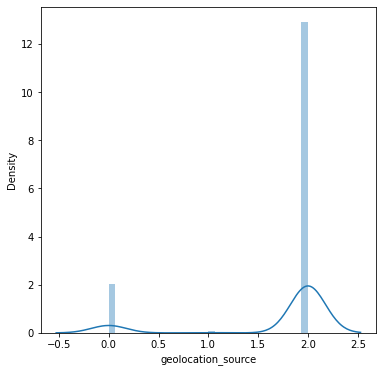

generation_gwh_2014


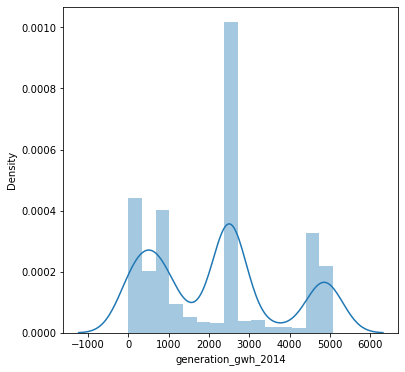

generation_gwh_2015


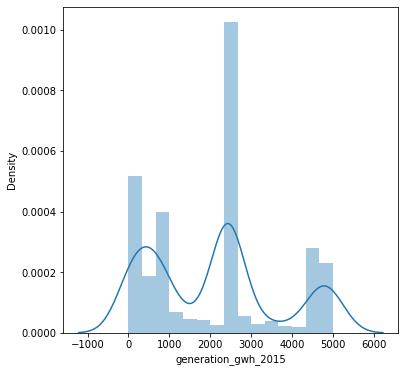

generation_gwh_2016


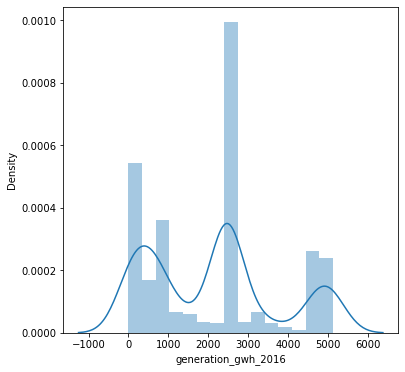

generation_gwh_2017


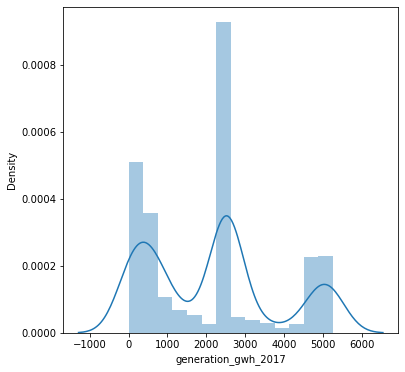

generation_gwh_2018


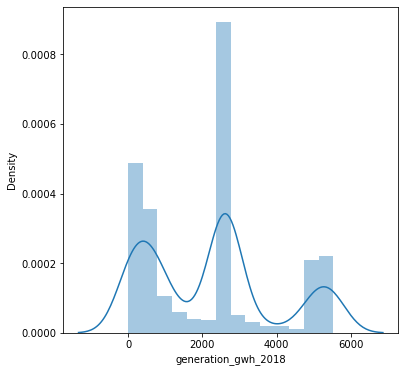

In [58]:
for i in result_set:
    print(i)
    plt.figure(figsize=(6,6))
    sns.distplot(result_set[i])
    plt.show()

In [59]:
result_set.skew()

capacity_mw            1.288530
primary_fuel           0.472251
commissioning_year    -1.187758
geolocation_source    -2.104805
generation_gwh_2014    0.405300
generation_gwh_2015    0.429546
generation_gwh_2016    0.435772
generation_gwh_2017    0.447084
generation_gwh_2018    0.482944
dtype: float64

can't mend with the skewness as we still don't know the co relation with the dependent variable

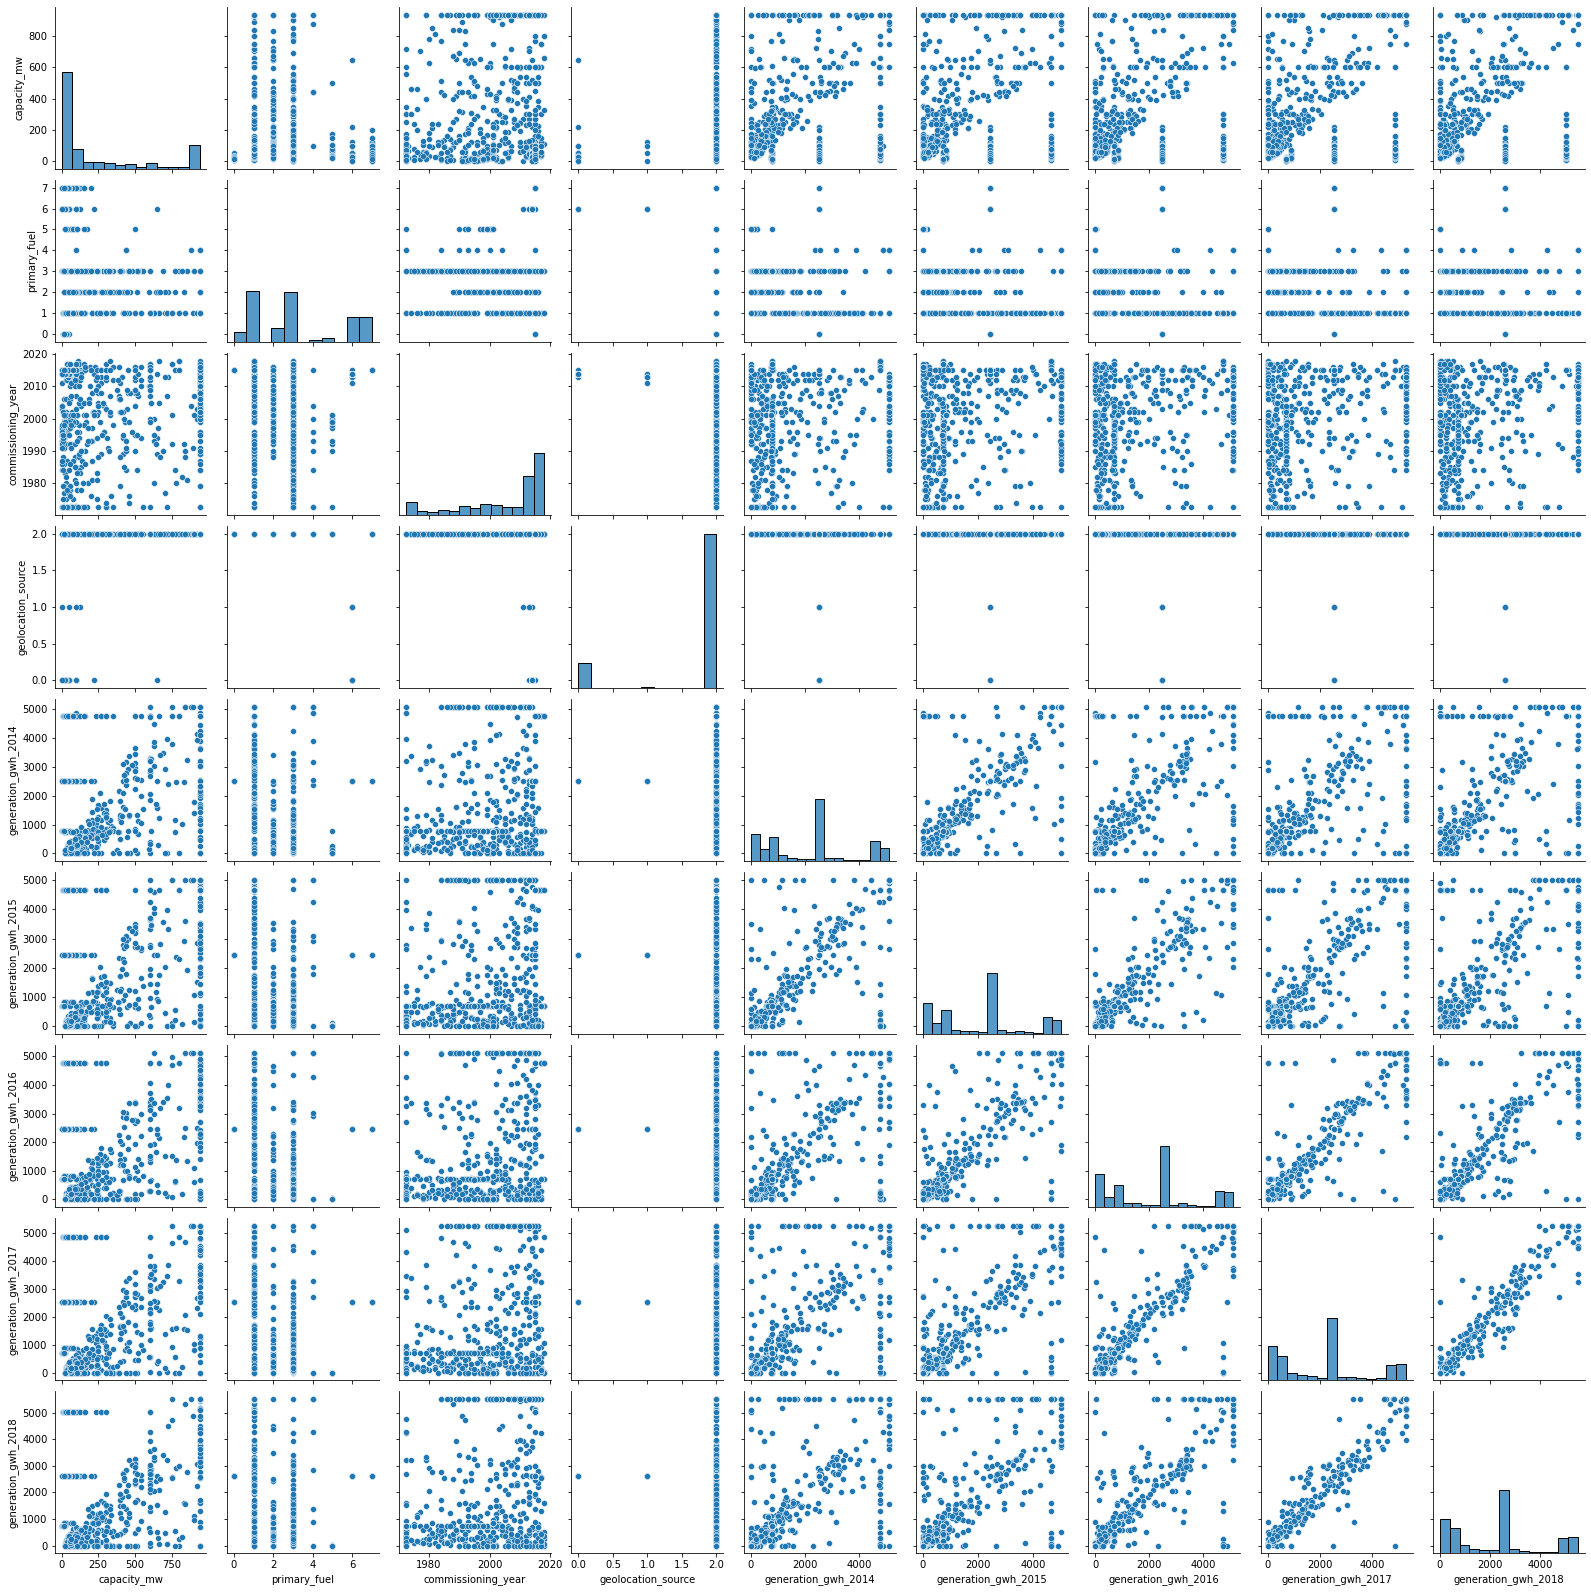

In [60]:
sns.pairplot(result_set)

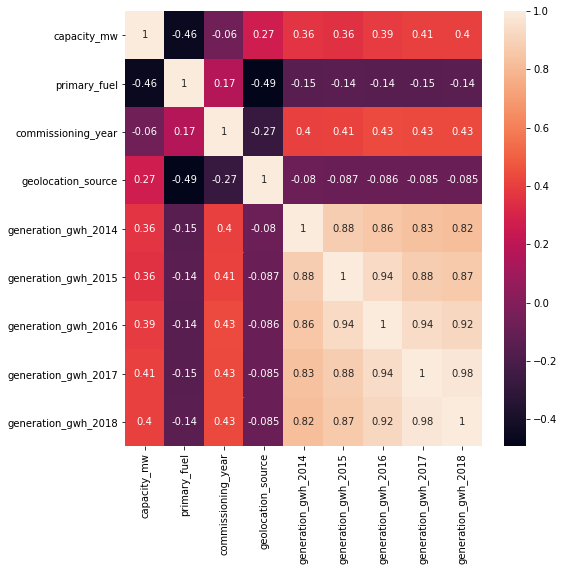

In [62]:
plt.figure(figsize=(8,8))
sns.heatmap(result_set.corr(), annot=True)
plt.show()

generation_gwh_2018 has very high multi collinearity with other generation_gwhs, so dropping every years generation_gwh except 2017 year

In [64]:
result_set.drop(columns=['generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2018'],inplace=True)

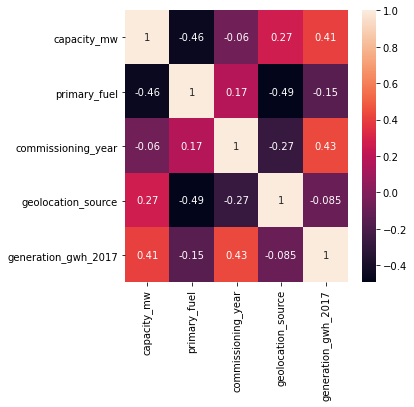

In [66]:
plt.figure(figsize=(5,5))
sns.heatmap(result_set.corr(), annot=True)
plt.show()

In [67]:
capacity_x=result_set.drop(columns=['capacity_mw'])
capacity_y=result_set['capacity_mw']
primary_fuel_x=result_set.drop(columns=['primary_fuel'])
primary_fuel_y=result_set['primary_fuel']

In [69]:
scalar= StandardScaler()

X_scaled_capacity= scalar.fit_transform(capacity_x)
vif_data1 = pd.DataFrame()
vif_data1["feature"] = capacity_x.columns

vif_data1["new VIF region"] = [variance_inflation_factor(X_scaled_capacity, i) for i in range(X_scaled_capacity.shape[1])]
  
vif_data1

,feature,new VIF region
0,primary_fuel,1.418600
1,commissioning_year,1.351013
2,geolocation_source,1.397512
3,generation_gwh_2017,1.319649


In [70]:
X_scaled_fuel= scalar.fit_transform(primary_fuel_x)
vif_data12 = pd.DataFrame()
vif_data12["feature"] = primary_fuel_x.columns

vif_data12["new VIF region"] = [variance_inflation_factor(X_scaled_fuel, i) for i in range(X_scaled_fuel.shape[1])]
  
vif_data12

,feature,new VIF region
0,capacity_mw,1.413560
1,commissioning_year,1.383510
2,geolocation_source,1.173032
3,generation_gwh_2017,1.612582


for capacity prediction the data doesn't seem imbalance between for primary fuel prediction the data is highly imbalanced

Class=6, n=127 (14.002%)
Class=1, n=258 (28.445%)
Class=7, n=123 (13.561%)
Class=2, n=69 (7.607%)
Class=3, n=251 (27.674%)
Class=0, n=50 (5.513%)
Class=5, n=20 (2.205%)
Class=4, n=9 (0.992%)


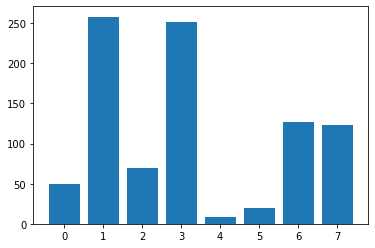

In [77]:
counter = Counter(primary_fuel_y)
for k,v in counter.items():
    per = v / len(primary_fuel_y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=6, n=258 (12.500%)
Class=1, n=258 (12.500%)
Class=7, n=258 (12.500%)
Class=2, n=258 (12.500%)
Class=3, n=258 (12.500%)
Class=0, n=258 (12.500%)
Class=5, n=258 (12.500%)
Class=4, n=258 (12.500%)


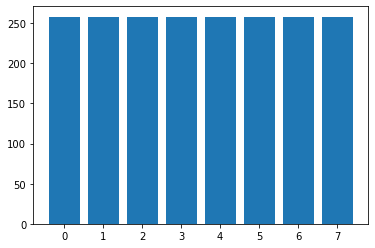

In [79]:
oversample = SMOTE()
X_scaled_fuel, primary_fuel_y = oversample.fit_resample(X_scaled_fuel, primary_fuel_y)

counter = Counter(primary_fuel_y)
for k,v in counter.items():
    per = v / len(primary_fuel_y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Balanced the primary fuel prediction data

In [80]:
X_trainc, X_testc, Y_trainc, Y_testc = train_test_split(X_scaled_capacity,capacity_y, test_size= 0.2, random_state=15)
X_trainf, X_testf, Y_trainf, Y_testf = train_test_split(X_scaled_fuel,primary_fuel_y, test_size= 0.2, random_state=15)

# PowerPlant Capacity Predicton

In [82]:
xgb=XGBRegressor()
param_grid = {
    'n_estimators': [20, 200],
    'max_depth': [3, 4, 5, 6, 8, 15],
    'learning_rate':[0.1,0.15,0.2,0.3],
    'gamma':[0.0,0.1,0.2,0.3],
    'n_jobs':[100,200,300]
}
CV_xgb = gs(xgb,param_grid=param_grid,scoring ='r2',cv=5,verbose=5)
CV_xgb.fit(X_trainc,Y_trainc)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits
[CV 1/5] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=20, n_jobs=100;, score=0.738 total time=   0.0s
[CV 2/5] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=20, n_jobs=100;, score=0.729 total time=   0.0s
[CV 3/5] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=20, n_jobs=100;, score=0.713 total time=   0.0s
[CV 4/5] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=20, n_jobs=100;, score=0.663 total time=   0.0s
[CV 5/5] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=20, n_jobs=100;, score=0.792 total time=   0.0s
[CV 1/5] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=20, n_jobs=200;, score=0.738 total time=   0.0s
[CV 2/5] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=20, n_jobs=200;, score=0.729 total time=   0.0s
[CV 3/5] END gamma=0.0, learning_rate=0.1, max_depth=3, n_estimators=20, n_jobs=200;, score=0.713 total time=   0.0s


[CV 1/5] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=20, n_jobs=300;, score=0.790 total time=   0.0s
[CV 2/5] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=20, n_jobs=300;, score=0.791 total time=   0.0s
[CV 3/5] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=20, n_jobs=300;, score=0.740 total time=   0.0s
[CV 4/5] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=20, n_jobs=300;, score=0.745 total time=   0.0s
[CV 5/5] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=20, n_jobs=300;, score=0.808 total time=   0.0s
[CV 1/5] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=100;, score=0.754 total time=   0.3s
[CV 2/5] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=100;, score=0.784 total time=   0.3s
[CV 3/5] END gamma=0.0, learning_rate=0.1, max_depth=5, n_estimators=200, n_jobs=100;, score=0.764 total time=   0.3s
[CV 4/5] END gamma=0.0, learning_rate=0.1, max_depth=5, n_est

[CV 1/5] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=200;, score=0.789 total time=   1.1s
[CV 2/5] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=200;, score=0.768 total time=   1.0s
[CV 3/5] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=200;, score=0.760 total time=   1.0s
[CV 4/5] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=200;, score=0.747 total time=   1.1s
[CV 5/5] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=200;, score=0.823 total time=   1.1s
[CV 1/5] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=300;, score=0.789 total time=   1.6s
[CV 2/5] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=300;, score=0.768 total time=   1.5s
[CV 3/5] END gamma=0.0, learning_rate=0.1, max_depth=8, n_estimators=200, n_jobs=300;, score=0.760 total time=   1.5s
[CV 4/5] END gamma=0.0, learning_rate=0.1, max_depth=8, 

[CV 2/5] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=20, n_jobs=200;, score=0.794 total time=   0.0s
[CV 3/5] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=20, n_jobs=200;, score=0.781 total time=   0.0s
[CV 4/5] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=20, n_jobs=200;, score=0.715 total time=   0.0s
[CV 5/5] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=20, n_jobs=200;, score=0.844 total time=   0.0s
[CV 1/5] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=20, n_jobs=300;, score=0.783 total time=   0.0s
[CV 2/5] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=20, n_jobs=300;, score=0.794 total time=   0.0s
[CV 3/5] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=20, n_jobs=300;, score=0.781 total time=   0.0s
[CV 4/5] END gamma=0.0, learning_rate=0.15, max_depth=4, n_estimators=20, n_jobs=300;, score=0.715 total time=   0.0s
[CV 5/5] END gamma=0.0, learning_rate=0.15, max_depth=4,

[CV 2/5] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=100;, score=0.781 total time=   0.2s
[CV 3/5] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=100;, score=0.751 total time=   0.2s
[CV 4/5] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=100;, score=0.727 total time=   0.2s
[CV 5/5] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=100;, score=0.831 total time=   0.2s
[CV 1/5] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=200;, score=0.763 total time=   0.4s
[CV 2/5] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=200;, score=0.781 total time=   0.4s
[CV 3/5] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=200;, score=0.751 total time=   0.4s
[CV 4/5] END gamma=0.0, learning_rate=0.15, max_depth=6, n_estimators=200, n_jobs=200;, score=0.727 total time=   0.4s
[CV 5/5] END gamma=0.0, learning_rate=0.15, max_

[CV 1/5] END gamma=0.0, learning_rate=0.15, max_depth=15, n_estimators=200, n_jobs=300;, score=0.804 total time=   2.1s
[CV 2/5] END gamma=0.0, learning_rate=0.15, max_depth=15, n_estimators=200, n_jobs=300;, score=0.769 total time=   2.2s
[CV 3/5] END gamma=0.0, learning_rate=0.15, max_depth=15, n_estimators=200, n_jobs=300;, score=0.757 total time=   1.9s
[CV 4/5] END gamma=0.0, learning_rate=0.15, max_depth=15, n_estimators=200, n_jobs=300;, score=0.724 total time=   2.2s
[CV 5/5] END gamma=0.0, learning_rate=0.15, max_depth=15, n_estimators=200, n_jobs=300;, score=0.784 total time=   2.1s
[CV 1/5] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=20, n_jobs=100;, score=0.785 total time=   0.0s
[CV 2/5] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=20, n_jobs=100;, score=0.797 total time=   0.0s
[CV 3/5] END gamma=0.0, learning_rate=0.2, max_depth=3, n_estimators=20, n_jobs=100;, score=0.784 total time=   0.0s
[CV 4/5] END gamma=0.0, learning_rate=0.2, max_de

[CV 1/5] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=20, n_jobs=200;, score=0.800 total time=   0.0s
[CV 2/5] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=20, n_jobs=200;, score=0.810 total time=   0.0s
[CV 3/5] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=20, n_jobs=200;, score=0.785 total time=   0.0s
[CV 4/5] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=20, n_jobs=200;, score=0.739 total time=   0.0s
[CV 5/5] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=20, n_jobs=200;, score=0.829 total time=   0.0s
[CV 1/5] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=20, n_jobs=300;, score=0.800 total time=   0.0s
[CV 2/5] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=20, n_jobs=300;, score=0.810 total time=   0.0s
[CV 3/5] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estimators=20, n_jobs=300;, score=0.785 total time=   0.0s
[CV 4/5] END gamma=0.0, learning_rate=0.2, max_depth=5, n_estima

[CV 1/5] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=100;, score=0.797 total time=   0.4s
[CV 2/5] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=100;, score=0.777 total time=   0.4s
[CV 3/5] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=100;, score=0.754 total time=   0.4s
[CV 4/5] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=100;, score=0.741 total time=   0.4s
[CV 5/5] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=100;, score=0.837 total time=   0.4s
[CV 1/5] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=200;, score=0.797 total time=   0.7s
[CV 2/5] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=200;, score=0.777 total time=   0.7s
[CV 3/5] END gamma=0.0, learning_rate=0.2, max_depth=8, n_estimators=200, n_jobs=200;, score=0.754 total time=   0.7s
[CV 4/5] END gamma=0.0, learning_rate=0.2, max_depth=8, 

[CV 1/5] END gamma=0.0, learning_rate=0.3, max_depth=3, n_estimators=200, n_jobs=300;, score=0.728 total time=   0.3s
[CV 2/5] END gamma=0.0, learning_rate=0.3, max_depth=3, n_estimators=200, n_jobs=300;, score=0.778 total time=   0.3s
[CV 3/5] END gamma=0.0, learning_rate=0.3, max_depth=3, n_estimators=200, n_jobs=300;, score=0.738 total time=   0.3s
[CV 4/5] END gamma=0.0, learning_rate=0.3, max_depth=3, n_estimators=200, n_jobs=300;, score=0.720 total time=   0.3s
[CV 5/5] END gamma=0.0, learning_rate=0.3, max_depth=3, n_estimators=200, n_jobs=300;, score=0.814 total time=   0.3s
[CV 1/5] END gamma=0.0, learning_rate=0.3, max_depth=4, n_estimators=20, n_jobs=100;, score=0.785 total time=   0.0s
[CV 2/5] END gamma=0.0, learning_rate=0.3, max_depth=4, n_estimators=20, n_jobs=100;, score=0.797 total time=   0.0s
[CV 3/5] END gamma=0.0, learning_rate=0.3, max_depth=4, n_estimators=20, n_jobs=100;, score=0.797 total time=   0.0s
[CV 4/5] END gamma=0.0, learning_rate=0.3, max_depth=4, n_e

[CV 1/5] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=20, n_jobs=200;, score=0.804 total time=   0.0s
[CV 2/5] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=20, n_jobs=200;, score=0.801 total time=   0.0s
[CV 3/5] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=20, n_jobs=200;, score=0.779 total time=   0.0s
[CV 4/5] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=20, n_jobs=200;, score=0.769 total time=   0.0s
[CV 5/5] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=20, n_jobs=200;, score=0.827 total time=   0.0s
[CV 1/5] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=20, n_jobs=300;, score=0.804 total time=   0.0s
[CV 2/5] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=20, n_jobs=300;, score=0.801 total time=   0.0s
[CV 3/5] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estimators=20, n_jobs=300;, score=0.779 total time=   0.0s
[CV 4/5] END gamma=0.0, learning_rate=0.3, max_depth=6, n_estima

[CV 1/5] END gamma=0.0, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=100;, score=0.803 total time=   0.4s
[CV 2/5] END gamma=0.0, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=100;, score=0.762 total time=   0.4s
[CV 3/5] END gamma=0.0, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=100;, score=0.752 total time=   0.4s
[CV 4/5] END gamma=0.0, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=100;, score=0.734 total time=   0.4s
[CV 5/5] END gamma=0.0, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=100;, score=0.794 total time=   0.4s
[CV 1/5] END gamma=0.0, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=200;, score=0.803 total time=   0.8s
[CV 2/5] END gamma=0.0, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=200;, score=0.762 total time=   0.8s
[CV 3/5] END gamma=0.0, learning_rate=0.3, max_depth=15, n_estimators=200, n_jobs=200;, score=0.752 total time=   0.7s
[CV 4/5] END gamma=0.0, learning_rate=0.3, max_d

[CV 1/5] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=300;, score=0.736 total time=   0.5s
[CV 2/5] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=300;, score=0.796 total time=   0.4s
[CV 3/5] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=300;, score=0.788 total time=   0.4s
[CV 4/5] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=300;, score=0.708 total time=   0.4s
[CV 5/5] END gamma=0.1, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=300;, score=0.854 total time=   0.4s
[CV 1/5] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=20, n_jobs=100;, score=0.790 total time=   0.0s
[CV 2/5] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=20, n_jobs=100;, score=0.791 total time=   0.0s
[CV 3/5] END gamma=0.1, learning_rate=0.1, max_depth=5, n_estimators=20, n_jobs=100;, score=0.740 total time=   0.0s
[CV 4/5] END gamma=0.1, learning_rate=0.1, max_depth=5, n_e

[CV 3/5] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=20, n_jobs=200;, score=0.743 total time=   0.0s
[CV 4/5] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=20, n_jobs=200;, score=0.748 total time=   0.0s
[CV 5/5] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=20, n_jobs=200;, score=0.809 total time=   0.0s
[CV 1/5] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=20, n_jobs=300;, score=0.793 total time=   0.0s
[CV 2/5] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=20, n_jobs=300;, score=0.777 total time=   0.0s
[CV 3/5] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=20, n_jobs=300;, score=0.743 total time=   0.0s
[CV 4/5] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=20, n_jobs=300;, score=0.748 total time=   0.0s
[CV 5/5] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estimators=20, n_jobs=300;, score=0.809 total time=   0.0s
[CV 1/5] END gamma=0.1, learning_rate=0.1, max_depth=8, n_estima

[CV 3/5] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=100;, score=0.752 total time=   0.1s
[CV 4/5] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=100;, score=0.727 total time=   0.1s
[CV 5/5] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=100;, score=0.819 total time=   0.1s
[CV 1/5] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=200;, score=0.754 total time=   0.2s
[CV 2/5] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=200;, score=0.788 total time=   0.2s
[CV 3/5] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=200;, score=0.752 total time=   0.2s
[CV 4/5] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=200;, score=0.727 total time=   0.2s
[CV 5/5] END gamma=0.1, learning_rate=0.15, max_depth=3, n_estimators=200, n_jobs=200;, score=0.819 total time=   0.2s
[CV 1/5] END gamma=0.1, learning_rate=0.15, max_

[CV 3/5] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=300;, score=0.751 total time=   0.6s
[CV 4/5] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=300;, score=0.716 total time=   0.6s
[CV 5/5] END gamma=0.1, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=300;, score=0.808 total time=   0.6s
[CV 1/5] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=20, n_jobs=100;, score=0.815 total time=   0.0s
[CV 2/5] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=20, n_jobs=100;, score=0.817 total time=   0.0s
[CV 3/5] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=20, n_jobs=100;, score=0.775 total time=   0.0s
[CV 4/5] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=20, n_jobs=100;, score=0.747 total time=   0.0s
[CV 5/5] END gamma=0.1, learning_rate=0.15, max_depth=6, n_estimators=20, n_jobs=100;, score=0.839 total time=   0.0s
[CV 1/5] END gamma=0.1, learning_rate=0.15, max_depth

[CV 3/5] END gamma=0.1, learning_rate=0.15, max_depth=15, n_estimators=20, n_jobs=200;, score=0.752 total time=   0.1s
[CV 4/5] END gamma=0.1, learning_rate=0.15, max_depth=15, n_estimators=20, n_jobs=200;, score=0.739 total time=   0.1s
[CV 5/5] END gamma=0.1, learning_rate=0.15, max_depth=15, n_estimators=20, n_jobs=200;, score=0.801 total time=   0.1s
[CV 1/5] END gamma=0.1, learning_rate=0.15, max_depth=15, n_estimators=20, n_jobs=300;, score=0.816 total time=   0.2s
[CV 2/5] END gamma=0.1, learning_rate=0.15, max_depth=15, n_estimators=20, n_jobs=300;, score=0.790 total time=   0.1s
[CV 3/5] END gamma=0.1, learning_rate=0.15, max_depth=15, n_estimators=20, n_jobs=300;, score=0.752 total time=   0.1s
[CV 4/5] END gamma=0.1, learning_rate=0.15, max_depth=15, n_estimators=20, n_jobs=300;, score=0.739 total time=   0.1s
[CV 5/5] END gamma=0.1, learning_rate=0.15, max_depth=15, n_estimators=20, n_jobs=300;, score=0.801 total time=   0.1s
[CV 1/5] END gamma=0.1, learning_rate=0.15, max_

[CV 3/5] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=200, n_jobs=100;, score=0.766 total time=   0.1s
[CV 4/5] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=200, n_jobs=100;, score=0.709 total time=   0.1s
[CV 5/5] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=200, n_jobs=100;, score=0.831 total time=   0.1s
[CV 1/5] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=200, n_jobs=200;, score=0.731 total time=   0.3s
[CV 2/5] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=200, n_jobs=200;, score=0.779 total time=   0.3s
[CV 3/5] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=200, n_jobs=200;, score=0.766 total time=   0.3s
[CV 4/5] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=200, n_jobs=200;, score=0.709 total time=   0.3s
[CV 5/5] END gamma=0.1, learning_rate=0.2, max_depth=4, n_estimators=200, n_jobs=200;, score=0.831 total time=   0.3s
[CV 1/5] END gamma=0.1, learning_rate=0.2, max_depth=4, 

[CV 3/5] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=300;, score=0.761 total time=   0.8s
[CV 4/5] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=300;, score=0.731 total time=   0.8s
[CV 5/5] END gamma=0.1, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=300;, score=0.831 total time=   0.8s
[CV 1/5] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=20, n_jobs=100;, score=0.822 total time=   0.0s
[CV 2/5] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=20, n_jobs=100;, score=0.793 total time=   0.0s
[CV 3/5] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=20, n_jobs=100;, score=0.772 total time=   0.0s
[CV 4/5] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=20, n_jobs=100;, score=0.765 total time=   0.0s
[CV 5/5] END gamma=0.1, learning_rate=0.2, max_depth=8, n_estimators=20, n_jobs=100;, score=0.847 total time=   0.0s
[CV 1/5] END gamma=0.1, learning_rate=0.2, max_depth=8, n_est

[CV 2/5] END gamma=0.1, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=300;, score=0.802 total time=   0.0s
[CV 3/5] END gamma=0.1, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=300;, score=0.779 total time=   0.0s
[CV 4/5] END gamma=0.1, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=300;, score=0.711 total time=   0.0s
[CV 5/5] END gamma=0.1, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=300;, score=0.841 total time=   0.0s
[CV 1/5] END gamma=0.1, learning_rate=0.3, max_depth=3, n_estimators=200, n_jobs=100;, score=0.728 total time=   0.1s
[CV 2/5] END gamma=0.1, learning_rate=0.3, max_depth=3, n_estimators=200, n_jobs=100;, score=0.778 total time=   0.1s
[CV 3/5] END gamma=0.1, learning_rate=0.3, max_depth=3, n_estimators=200, n_jobs=100;, score=0.738 total time=   0.1s
[CV 4/5] END gamma=0.1, learning_rate=0.3, max_depth=3, n_estimators=200, n_jobs=100;, score=0.720 total time=   0.1s
[CV 5/5] END gamma=0.1, learning_rate=0.3, max_depth=3, n_es

[CV 2/5] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=200;, score=0.784 total time=   0.4s
[CV 3/5] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=200;, score=0.727 total time=   0.4s
[CV 4/5] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=200;, score=0.715 total time=   0.4s
[CV 5/5] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=200;, score=0.821 total time=   0.4s
[CV 1/5] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=300;, score=0.714 total time=   0.6s
[CV 2/5] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=300;, score=0.784 total time=   0.7s
[CV 3/5] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=300;, score=0.727 total time=   0.6s
[CV 4/5] END gamma=0.1, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=300;, score=0.715 total time=   0.6s
[CV 5/5] END gamma=0.1, learning_rate=0.3, max_depth=5, 

[CV 2/5] END gamma=0.1, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=100;, score=0.764 total time=   0.0s
[CV 3/5] END gamma=0.1, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=100;, score=0.752 total time=   0.0s
[CV 4/5] END gamma=0.1, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=100;, score=0.740 total time=   0.0s
[CV 5/5] END gamma=0.1, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=100;, score=0.796 total time=   0.0s
[CV 1/5] END gamma=0.1, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=200;, score=0.807 total time=   0.1s
[CV 2/5] END gamma=0.1, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=200;, score=0.764 total time=   0.1s
[CV 3/5] END gamma=0.1, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=200;, score=0.752 total time=   0.1s
[CV 4/5] END gamma=0.1, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=200;, score=0.740 total time=   0.1s
[CV 5/5] END gamma=0.1, learning_rate=0.3, max_depth=15,

[CV 4/5] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=20, n_jobs=300;, score=0.697 total time=   0.0s
[CV 5/5] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=20, n_jobs=300;, score=0.819 total time=   0.0s
[CV 1/5] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=100;, score=0.736 total time=   0.2s
[CV 2/5] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=100;, score=0.796 total time=   0.2s
[CV 3/5] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=100;, score=0.788 total time=   0.2s
[CV 4/5] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=100;, score=0.708 total time=   0.2s
[CV 5/5] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=100;, score=0.854 total time=   0.2s
[CV 1/5] END gamma=0.2, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=200;, score=0.736 total time=   0.3s
[CV 2/5] END gamma=0.2, learning_rate=0.1, max_depth=4, n_

[CV 4/5] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=200;, score=0.739 total time=   0.5s
[CV 5/5] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=200;, score=0.839 total time=   0.5s
[CV 1/5] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.777 total time=   0.8s
[CV 2/5] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.797 total time=   0.8s
[CV 3/5] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.752 total time=   0.8s
[CV 4/5] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.739 total time=   0.8s
[CV 5/5] END gamma=0.2, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.839 total time=   0.8s
[CV 1/5] END gamma=0.2, learning_rate=0.1, max_depth=8, n_estimators=20, n_jobs=100;, score=0.793 total time=   0.0s
[CV 2/5] END gamma=0.2, learning_rate=0.1, max_depth=8, n

[CV 2/5] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=20, n_jobs=200;, score=0.782 total time=   0.0s
[CV 3/5] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=20, n_jobs=200;, score=0.769 total time=   0.0s
[CV 4/5] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=20, n_jobs=200;, score=0.698 total time=   0.0s
[CV 5/5] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=20, n_jobs=200;, score=0.830 total time=   0.0s
[CV 1/5] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=20, n_jobs=300;, score=0.781 total time=   0.0s
[CV 2/5] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=20, n_jobs=300;, score=0.782 total time=   0.0s
[CV 3/5] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=20, n_jobs=300;, score=0.769 total time=   0.0s
[CV 4/5] END gamma=0.2, learning_rate=0.15, max_depth=3, n_estimators=20, n_jobs=300;, score=0.698 total time=   0.0s
[CV 5/5] END gamma=0.2, learning_rate=0.15, max_depth=3,

[CV 2/5] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=100;, score=0.790 total time=   0.2s
[CV 3/5] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=100;, score=0.751 total time=   0.2s
[CV 4/5] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=100;, score=0.716 total time=   0.2s
[CV 5/5] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=100;, score=0.808 total time=   0.2s
[CV 1/5] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=200;, score=0.738 total time=   0.4s
[CV 2/5] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=200;, score=0.790 total time=   0.4s
[CV 3/5] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=200;, score=0.751 total time=   0.4s
[CV 4/5] END gamma=0.2, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=200;, score=0.716 total time=   0.4s
[CV 5/5] END gamma=0.2, learning_rate=0.15, max_

[CV 2/5] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=300;, score=0.767 total time=   1.1s
[CV 3/5] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=300;, score=0.761 total time=   1.1s
[CV 4/5] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=300;, score=0.745 total time=   1.1s
[CV 5/5] END gamma=0.2, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=300;, score=0.818 total time=   1.1s
[CV 1/5] END gamma=0.2, learning_rate=0.15, max_depth=15, n_estimators=20, n_jobs=100;, score=0.816 total time=   0.0s
[CV 2/5] END gamma=0.2, learning_rate=0.15, max_depth=15, n_estimators=20, n_jobs=100;, score=0.790 total time=   0.0s
[CV 3/5] END gamma=0.2, learning_rate=0.15, max_depth=15, n_estimators=20, n_jobs=100;, score=0.752 total time=   0.0s
[CV 4/5] END gamma=0.2, learning_rate=0.15, max_depth=15, n_estimators=20, n_jobs=100;, score=0.739 total time=   0.0s
[CV 5/5] END gamma=0.2, learning_rate=0.15, max_

[CV 1/5] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=20, n_jobs=300;, score=0.786 total time=   0.0s
[CV 2/5] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=20, n_jobs=300;, score=0.800 total time=   0.0s
[CV 3/5] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=20, n_jobs=300;, score=0.791 total time=   0.0s
[CV 4/5] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=20, n_jobs=300;, score=0.717 total time=   0.0s
[CV 5/5] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=20, n_jobs=300;, score=0.849 total time=   0.0s
[CV 1/5] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=200, n_jobs=100;, score=0.731 total time=   0.1s
[CV 2/5] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=200, n_jobs=100;, score=0.779 total time=   0.1s
[CV 3/5] END gamma=0.2, learning_rate=0.2, max_depth=4, n_estimators=200, n_jobs=100;, score=0.766 total time=   0.1s
[CV 4/5] END gamma=0.2, learning_rate=0.2, max_depth=4, n_est

[CV 1/5] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.768 total time=   0.6s
[CV 2/5] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.791 total time=   0.5s
[CV 3/5] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.760 total time=   0.5s
[CV 4/5] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.733 total time=   0.6s
[CV 5/5] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.832 total time=   0.6s
[CV 1/5] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=300;, score=0.768 total time=   0.7s
[CV 2/5] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=300;, score=0.791 total time=   0.7s
[CV 3/5] END gamma=0.2, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=300;, score=0.760 total time=   0.7s
[CV 4/5] END gamma=0.2, learning_rate=0.2, max_depth=6, 

[CV 3/5] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=200;, score=0.779 total time=   0.0s
[CV 4/5] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=200;, score=0.711 total time=   0.0s
[CV 5/5] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=200;, score=0.841 total time=   0.0s
[CV 1/5] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=300;, score=0.791 total time=   0.0s
[CV 2/5] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=300;, score=0.802 total time=   0.0s
[CV 3/5] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=300;, score=0.779 total time=   0.0s
[CV 4/5] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=300;, score=0.711 total time=   0.0s
[CV 5/5] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=300;, score=0.841 total time=   0.0s
[CV 1/5] END gamma=0.2, learning_rate=0.3, max_depth=3, n_estima

[CV 3/5] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=100;, score=0.726 total time=   0.2s
[CV 4/5] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=100;, score=0.715 total time=   0.2s
[CV 5/5] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=100;, score=0.821 total time=   0.2s
[CV 1/5] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=200;, score=0.713 total time=   0.4s
[CV 2/5] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=200;, score=0.783 total time=   0.4s
[CV 3/5] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=200;, score=0.726 total time=   0.4s
[CV 4/5] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=200;, score=0.715 total time=   0.4s
[CV 5/5] END gamma=0.2, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=200;, score=0.821 total time=   0.4s
[CV 1/5] END gamma=0.2, learning_rate=0.3, max_depth=5, 

[CV 3/5] END gamma=0.2, learning_rate=0.3, max_depth=8, n_estimators=200, n_jobs=300;, score=0.755 total time=   1.0s
[CV 4/5] END gamma=0.2, learning_rate=0.3, max_depth=8, n_estimators=200, n_jobs=300;, score=0.735 total time=   1.0s
[CV 5/5] END gamma=0.2, learning_rate=0.3, max_depth=8, n_estimators=200, n_jobs=300;, score=0.811 total time=   1.0s
[CV 1/5] END gamma=0.2, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=100;, score=0.807 total time=   0.0s
[CV 2/5] END gamma=0.2, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=100;, score=0.763 total time=   0.0s
[CV 3/5] END gamma=0.2, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=100;, score=0.752 total time=   0.0s
[CV 4/5] END gamma=0.2, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=100;, score=0.740 total time=   0.0s
[CV 5/5] END gamma=0.2, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=100;, score=0.796 total time=   0.0s
[CV 1/5] END gamma=0.2, learning_rate=0.3, max_depth=15,

[CV 1/5] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=20, n_jobs=300;, score=0.765 total time=   0.1s
[CV 2/5] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=20, n_jobs=300;, score=0.757 total time=   0.0s
[CV 3/5] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=20, n_jobs=300;, score=0.745 total time=   0.0s
[CV 4/5] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=20, n_jobs=300;, score=0.697 total time=   0.0s
[CV 5/5] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=20, n_jobs=300;, score=0.819 total time=   0.0s
[CV 1/5] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=100;, score=0.736 total time=   0.2s
[CV 2/5] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=100;, score=0.796 total time=   0.1s
[CV 3/5] END gamma=0.3, learning_rate=0.1, max_depth=4, n_estimators=200, n_jobs=100;, score=0.788 total time=   0.1s
[CV 4/5] END gamma=0.3, learning_rate=0.1, max_depth=4, n_est

[CV 1/5] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=200;, score=0.778 total time=   0.5s
[CV 2/5] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=200;, score=0.797 total time=   0.5s
[CV 3/5] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=200;, score=0.752 total time=   0.5s
[CV 4/5] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=200;, score=0.739 total time=   0.5s
[CV 5/5] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=200;, score=0.839 total time=   0.5s
[CV 1/5] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.778 total time=   0.9s
[CV 2/5] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.797 total time=   0.8s
[CV 3/5] END gamma=0.3, learning_rate=0.1, max_depth=6, n_estimators=200, n_jobs=300;, score=0.752 total time=   0.8s
[CV 4/5] END gamma=0.3, learning_rate=0.1, max_depth=6, 

[CV 3/5] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=20, n_jobs=200;, score=0.769 total time=   0.0s
[CV 4/5] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=20, n_jobs=200;, score=0.698 total time=   0.0s
[CV 5/5] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=20, n_jobs=200;, score=0.830 total time=   0.0s
[CV 1/5] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=20, n_jobs=300;, score=0.781 total time=   0.0s
[CV 2/5] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=20, n_jobs=300;, score=0.782 total time=   0.0s
[CV 3/5] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=20, n_jobs=300;, score=0.769 total time=   0.0s
[CV 4/5] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=20, n_jobs=300;, score=0.698 total time=   0.0s
[CV 5/5] END gamma=0.3, learning_rate=0.15, max_depth=3, n_estimators=20, n_jobs=300;, score=0.830 total time=   0.0s
[CV 1/5] END gamma=0.3, learning_rate=0.15, max_depth=3,

[CV 3/5] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=100;, score=0.751 total time=   0.2s
[CV 4/5] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=100;, score=0.716 total time=   0.2s
[CV 5/5] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=100;, score=0.808 total time=   0.2s
[CV 1/5] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=200;, score=0.738 total time=   0.4s
[CV 2/5] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=200;, score=0.790 total time=   0.4s
[CV 3/5] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=200;, score=0.751 total time=   0.4s
[CV 4/5] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=200;, score=0.716 total time=   0.4s
[CV 5/5] END gamma=0.3, learning_rate=0.15, max_depth=5, n_estimators=200, n_jobs=200;, score=0.808 total time=   0.4s
[CV 1/5] END gamma=0.3, learning_rate=0.15, max_

[CV 3/5] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=300;, score=0.760 total time=   1.1s
[CV 4/5] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=300;, score=0.743 total time=   1.1s
[CV 5/5] END gamma=0.3, learning_rate=0.15, max_depth=8, n_estimators=200, n_jobs=300;, score=0.820 total time=   1.1s
[CV 1/5] END gamma=0.3, learning_rate=0.15, max_depth=15, n_estimators=20, n_jobs=100;, score=0.816 total time=   0.0s
[CV 2/5] END gamma=0.3, learning_rate=0.15, max_depth=15, n_estimators=20, n_jobs=100;, score=0.790 total time=   0.0s
[CV 3/5] END gamma=0.3, learning_rate=0.15, max_depth=15, n_estimators=20, n_jobs=100;, score=0.752 total time=   0.0s
[CV 4/5] END gamma=0.3, learning_rate=0.15, max_depth=15, n_estimators=20, n_jobs=100;, score=0.737 total time=   0.0s
[CV 5/5] END gamma=0.3, learning_rate=0.15, max_depth=15, n_estimators=20, n_jobs=100;, score=0.801 total time=   0.0s
[CV 1/5] END gamma=0.3, learning_rate=0.15, max_

[CV 1/5] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=20, n_jobs=300;, score=0.786 total time=   0.0s
[CV 2/5] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=20, n_jobs=300;, score=0.800 total time=   0.0s
[CV 3/5] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=20, n_jobs=300;, score=0.791 total time=   0.0s
[CV 4/5] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=20, n_jobs=300;, score=0.717 total time=   0.0s
[CV 5/5] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=20, n_jobs=300;, score=0.849 total time=   0.0s
[CV 1/5] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=200, n_jobs=100;, score=0.731 total time=   0.2s
[CV 2/5] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=200, n_jobs=100;, score=0.779 total time=   0.1s
[CV 3/5] END gamma=0.3, learning_rate=0.2, max_depth=4, n_estimators=200, n_jobs=100;, score=0.766 total time=   0.2s
[CV 4/5] END gamma=0.3, learning_rate=0.2, max_depth=4, n_est

[CV 1/5] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.768 total time=   0.5s
[CV 2/5] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.791 total time=   0.5s
[CV 3/5] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.760 total time=   0.5s
[CV 4/5] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.732 total time=   0.5s
[CV 5/5] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=200;, score=0.832 total time=   0.5s
[CV 1/5] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=300;, score=0.768 total time=   0.9s
[CV 2/5] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=300;, score=0.791 total time=   0.8s
[CV 3/5] END gamma=0.3, learning_rate=0.2, max_depth=6, n_estimators=200, n_jobs=300;, score=0.760 total time=   0.8s
[CV 4/5] END gamma=0.3, learning_rate=0.2, max_depth=6, 

[CV 3/5] END gamma=0.3, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=200;, score=0.779 total time=   0.0s
[CV 4/5] END gamma=0.3, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=200;, score=0.711 total time=   0.0s
[CV 5/5] END gamma=0.3, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=200;, score=0.841 total time=   0.0s
[CV 1/5] END gamma=0.3, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=300;, score=0.791 total time=   0.0s
[CV 2/5] END gamma=0.3, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=300;, score=0.802 total time=   0.0s
[CV 3/5] END gamma=0.3, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=300;, score=0.779 total time=   0.0s
[CV 4/5] END gamma=0.3, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=300;, score=0.711 total time=   0.0s
[CV 5/5] END gamma=0.3, learning_rate=0.3, max_depth=3, n_estimators=20, n_jobs=300;, score=0.841 total time=   0.0s
[CV 1/5] END gamma=0.3, learning_rate=0.3, max_depth=3, n_estima

[CV 3/5] END gamma=0.3, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=100;, score=0.726 total time=   0.2s
[CV 4/5] END gamma=0.3, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=100;, score=0.718 total time=   0.2s
[CV 5/5] END gamma=0.3, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=100;, score=0.822 total time=   0.2s
[CV 1/5] END gamma=0.3, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=200;, score=0.713 total time=   0.4s
[CV 2/5] END gamma=0.3, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=200;, score=0.783 total time=   0.4s
[CV 3/5] END gamma=0.3, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=200;, score=0.726 total time=   0.4s
[CV 4/5] END gamma=0.3, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=200;, score=0.718 total time=   0.4s
[CV 5/5] END gamma=0.3, learning_rate=0.3, max_depth=5, n_estimators=200, n_jobs=200;, score=0.822 total time=   0.4s
[CV 1/5] END gamma=0.3, learning_rate=0.3, max_depth=5, 

[CV 3/5] END gamma=0.3, learning_rate=0.3, max_depth=8, n_estimators=200, n_jobs=300;, score=0.754 total time=   1.0s
[CV 4/5] END gamma=0.3, learning_rate=0.3, max_depth=8, n_estimators=200, n_jobs=300;, score=0.733 total time=   1.0s
[CV 5/5] END gamma=0.3, learning_rate=0.3, max_depth=8, n_estimators=200, n_jobs=300;, score=0.811 total time=   1.0s
[CV 1/5] END gamma=0.3, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=100;, score=0.807 total time=   0.0s
[CV 2/5] END gamma=0.3, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=100;, score=0.762 total time=   0.0s
[CV 3/5] END gamma=0.3, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=100;, score=0.752 total time=   0.0s
[CV 4/5] END gamma=0.3, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=100;, score=0.740 total time=   0.0s
[CV 5/5] END gamma=0.3, learning_rate=0.3, max_depth=15, n_estimators=20, n_jobs=100;, score=0.795 total time=   0.0s
[CV 1/5] END gamma=0.3, learning_rate=0.3, max_depth=15,

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    num_parallel_tree=None, predictor=None,
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                 

In [148]:
CV_xgb.best_score_

0.8066890860945668

In [83]:
CV_xgb.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20, n_jobs=100,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [85]:
model1=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=6, min_child_weight=1,n_estimators=20, n_jobs=100,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
model1.fit(X_trainc,Y_trainc)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0.0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20, n_jobs=100,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [91]:
scores1 = cross_val_score(model1, X_testc, Y_testc, scoring='r2', cv=5)
print('Mean R2 Score for XGB Regression :',mean(scores1),'\nStandard Deviation is : ',std(scores1))

Mean R2 Score for XGB Regression : 0.808409348338604 
Standard Deviation is :  0.1008451611779099


In [92]:
rfr= RandomForestRegressor()
parameter_rfr={
         'n_estimators': [80,100,200,300,400,500],
         'max_features': ['auto', 'sqrt'],
         'max_depth': [2,4,6,8],
         'min_samples_split': [2, 5, 10],
         'min_samples_leaf': [1, 2,3,4,5],
         'bootstrap': [True, False]
         
}
rfr_gs= gs(estimator =rfr, param_grid=parameter_rfr,cv=5, verbose=2, n_jobs=5)
rfr_gs.fit(X_trainc,Y_trainc)

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=5,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4, 6, 8],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [80, 100, 200, 300, 400, 500]},
             verbose=2)

In [147]:
rfr_gs.best_score_

0.8194367272243106

In [93]:
rfr_gs.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=8, max_features='sqrt',
                      min_samples_split=10, n_estimators=300)

In [94]:
model2=RandomForestRegressor(bootstrap=False, max_depth=8, max_features='sqrt',
                      min_samples_split=10, n_estimators=300)
model2.fit(X_trainc,Y_trainc)

RandomForestRegressor(bootstrap=False, max_depth=8, max_features='sqrt',
                      min_samples_split=10, n_estimators=300)

In [95]:
scores2 = cross_val_score(model2, X_testc, Y_testc, scoring='r2', cv=5)
print('Mean R2 Score for Random Forest Regression :',mean(scores2),'\nStandard Deviation is : ',std(scores2))

Mean R2 Score for Random Forest Regression : 0.8156798877920541 
Standard Deviation is :  0.10069030473128146


In [100]:
dtree = DecisionTreeRegressor()
parameter_dtc_={    
            "splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] 
}
dtcR_gs= gs(estimator =dtree, param_grid=parameter_dtc_,cv=5, n_jobs=5)
dtcR_gs.fit(X_trainc,Y_trainc)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=5,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']})

In [146]:
dtcR_gs.best_score_

0.6310308421162343

In [101]:
dtcR_gs.best_estimator_

DecisionTreeRegressor(max_depth=5, max_features='auto', min_samples_leaf=7,
                      min_weight_fraction_leaf=0.1)

In [102]:
model3=DecisionTreeRegressor(max_depth=5, max_features='auto', min_samples_leaf=7,
                      min_weight_fraction_leaf=0.1)
model3.fit(X_trainc,Y_trainc)

DecisionTreeRegressor(max_depth=5, max_features='auto', min_samples_leaf=7,
                      min_weight_fraction_leaf=0.1)

In [103]:
scores3 = cross_val_score(model3, X_testc, Y_testc, scoring='r2', cv=5)
print('Mean R2 Score for DecisionTree Regression :',mean(scores3),'\nStandard Deviation is : ',std(scores3))

Mean R2 Score for DecisionTree Regression : 0.6123785419858804 
Standard Deviation is :  0.185756044238346


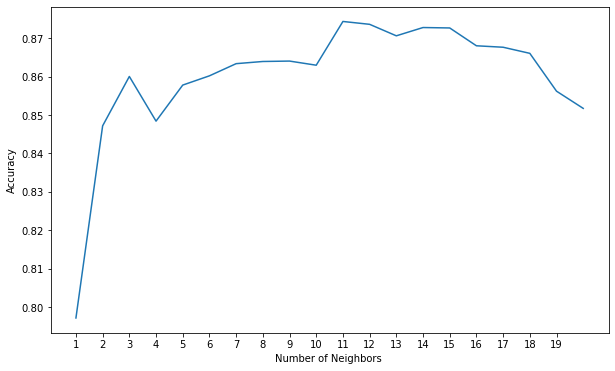

In [111]:
knn_p=KNeighborsRegressor()
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsRegressor(n_neighbors = i).fit(X_trainc,Y_trainc)
    yhat2= knn.predict(X_testc)
    mean_acc[i-1] = metrics.r2_score(Y_testc, yhat2)

loc = np.arange(1,20,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [116]:
knn=KNeighborsRegressor()
para={
        'n_neighbors':[8,9,10,11,12,13,14],
        'weights':['uniform', 'distance'],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute','auto'],
        'leaf_size':[30,40,50],
        'p':[2],
        'metric':['minkowski']
    
}
knn_gs= gs(estimator =knn, param_grid=para,cv=5, n_jobs=5)
knn_gs.fit(X_trainc,Y_trainc)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(), n_jobs=5,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute',
                                       'auto'],
                         'leaf_size': [30, 40, 50], 'metric': ['minkowski'],
                         'n_neighbors': [8, 9, 10, 11, 12, 13, 14], 'p': [2],
                         'weights': ['uniform', 'distance']})

In [145]:
knn_gs.best_score_

0.7707180682888948

In [117]:
knn_gs.best_estimator_

KNeighborsRegressor(algorithm='ball_tree', n_neighbors=9, weights='distance')

In [136]:
model4=KNeighborsRegressor(algorithm='ball_tree', n_neighbors=9, weights='distance')
model4.fit(X_trainc,Y_trainc)

KNeighborsRegressor(algorithm='ball_tree', n_neighbors=9, weights='distance')

In [144]:
scores4 = cross_val_score(model4, X_testc, Y_testc, scoring='r2', cv=4)
print('Mean R2 Score for KNeighbors Regression :',mean(scores4),'\nStandard Deviation is : ',std(scores4))

Mean R2 Score for KNeighbors Regression : 0.7401120724466486 
Standard Deviation is :  0.04968329085320726


KNN Regressor model r2 is less compared to random forest and XGB though its standard deviation very minimal compared to those 2 model so KNN is better suited model

In [149]:
#saving the model
KNN_Model_for_capacity= pickle.dumps(model4)

# PowerPlant Primary Fuel Predicton

In [173]:
svm_region_model=SVC()
parameter_svm={
            'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']
    
}
svmR_gs= gs(estimator =svm_region_model, param_grid=parameter_svm,cv=5,refit=True, n_jobs=5)
svmR_gs.fit(X_trainf,Y_trainf)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=5,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']})

In [174]:
svmR_gs.best_estimator_

SVC(C=1000, gamma=1)

In [175]:
model5=SVC(C=1000, gamma=1)
model5.fit(X_trainf,Y_trainf)
fuel_p=model5.predict(X_testf)
print(classification_report(fuel_p, Y_testf))

              precision    recall  f1-score   support

           0       1.00      0.63      0.77        81
           1       0.81      0.76      0.79        55
           2       0.91      0.88      0.89        58
           3       0.74      0.88      0.80        40
           4       0.88      0.80      0.84        56
           5       0.92      0.97      0.95        63
           6       1.00      1.00      1.00        43
           7       0.36      1.00      0.53        17

    accuracy                           0.84       413
   macro avg       0.83      0.86      0.82       413
weighted avg       0.88      0.84      0.84       413



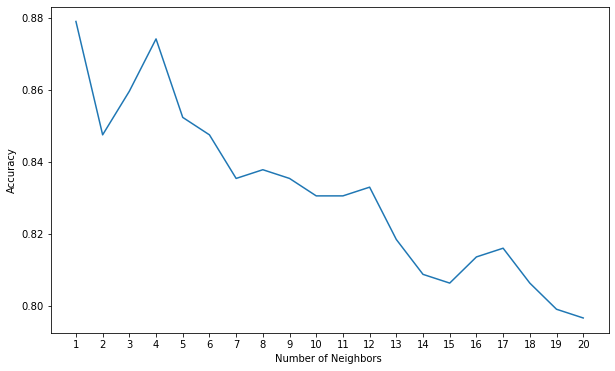

In [154]:
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_trainf,Y_trainf)
    yhat= knn.predict(X_testf)
    mean_acc[i-1] = metrics.accuracy_score(Y_testf, yhat)

loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

In [155]:
knn_region_model=KNeighborsClassifier()
para2={
        'n_neighbors':[1,2,3,4],
        'weights':['uniform', 'distance'],
        'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute','auto'],
        'leaf_size':[30,40,50],
        'p':[2],
        'metric':['minkowski']
    
}
knnR_gs= gs(estimator =knn_region_model, param_grid=para2,cv=5, n_jobs=5)
knnR_gs.fit(X_trainf,Y_trainf)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=5,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute',
                                       'auto'],
                         'leaf_size': [30, 40, 50], 'metric': ['minkowski'],
                         'n_neighbors': [1, 2, 3, 4], 'p': [2],
                         'weights': ['uniform', 'distance']})

In [156]:
knnR_gs.best_estimator_

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [158]:
model6=KNeighborsClassifier(n_neighbors=2, weights='distance')
model6.fit(X_trainf,Y_trainf)
fuel_p2=model6.predict(X_testf)
print(classification_report(fuel_p2, Y_testf))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        51
           1       0.88      0.82      0.85        56
           2       0.86      0.87      0.86        55
           3       0.79      0.88      0.83        42
           4       0.94      0.89      0.91        54
           5       0.95      0.97      0.96        65
           6       1.00      1.00      1.00        43
           7       0.81      0.81      0.81        47

    accuracy                           0.88       413
   macro avg       0.88      0.88      0.88       413
weighted avg       0.89      0.88      0.88       413



In [159]:
rfc_region_model=RandomForestClassifier()
paras2={
      'max_depth':[1,2,3,4,5],
    'min_samples_split':[1,2,3,4],
    'max_leaf_nodes':[10,20,30,40,50],
    'min_samples_leaf':[100,200,300,400],
    'n_estimators':[100,200,300,400],
    'max_samples': [0.1,0.2,0.3,0.4],
    'max_features':[1,2,3,4]
}
rfcR_rs= gs(estimator =rfc_region_model, param_grid=paras2,cv=5, n_jobs=10)
rfcR_rs.fit(X_trainf,Y_trainf)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=10,
             param_grid={'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [1, 2, 3, 4],
                         'max_leaf_nodes': [10, 20, 30, 40, 50],
                         'max_samples': [0.1, 0.2, 0.3, 0.4],
                         'min_samples_leaf': [100, 200, 300, 400],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [100, 200, 300, 400]})

In [160]:
rfcR_rs.best_estimator_

RandomForestClassifier(max_depth=2, max_features=1, max_leaf_nodes=40,
                       max_samples=0.4, min_samples_leaf=100,
                       min_samples_split=3, n_estimators=400)

In [161]:
model7=RandomForestClassifier(max_depth=2, max_features=1, max_leaf_nodes=40,
                       max_samples=0.4, min_samples_leaf=100,
                       min_samples_split=3, n_estimators=400)
model7.fit(X_trainf,Y_trainf)
fuel_p3=model7.predict(X_testf)
print(classification_report(fuel_p3, Y_testf))

              precision    recall  f1-score   support

           0       0.57      0.71      0.63        41
           1       0.10      0.83      0.17         6
           2       0.52      0.57      0.54        51
           3       0.47      0.54      0.50        41
           4       0.90      0.60      0.72        77
           5       0.91      0.80      0.85        75
           6       1.00      1.00      1.00        43
           7       0.81      0.48      0.60        79

    accuracy                           0.66       413
   macro avg       0.66      0.69      0.63       413
weighted avg       0.76      0.66      0.69       413



In [167]:
y_pred1=model6.predict_proba(X_testf)

In [169]:
y_pred2=model7.predict_proba(X_testf)

In [179]:
print('KNEIGHBORS CLASSIFIER')
macro_roc_auc_ovo = roc_auc_score(Y_testf, y_pred1, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(
    Y_testf, y_pred1, multi_class="ovo", average="weighted"
)
macro_roc_auc_ovr = roc_auc_score(Y_testf, y_pred1, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(
    Y_testf, y_pred1, multi_class="ovr", average="weighted"
)
print(
    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
)
print(
    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
)

KNEIGHBORS CLASSIFIER
One-vs-One ROC AUC scores:
0.954833 (macro),
0.955140 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.954957 (macro),
0.955517 (weighted by prevalence)


In [180]:
print('RANDOM FOREST CLASSIFIER')
macro_roc_auc_ovo = roc_auc_score(Y_testf, y_pred2, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(
    Y_testf, y_pred2, multi_class="ovo", average="weighted"
)
macro_roc_auc_ovr = roc_auc_score(Y_testf, y_pred2, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(
    Y_testf, y_pred2, multi_class="ovr", average="weighted"
)
print(
    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
)
print(
    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
)

RANDOM FOREST CLASSIFIER
One-vs-One ROC AUC scores:
0.930777 (macro),
0.930417 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.929319 (macro),
0.930324 (weighted by prevalence)


roc auc score for SVC couldn't be achieved due to false probability. even so the precision, recall, and f1 score low compared to Random Forest and KNeighbors Classifier

Selecting KNeighbors Classifier model as the roc value slightly better, also f1 score, precision, recall value for all the classes are better compared to Random Forest and SVC models 

In [181]:
#saving the model
KNN_Model_for_primary_fuel= pickle.dumps(model6)